## Solution Titanic Challenge 
#### from Kaggle: Titanic: Machine Learning from Disaster

## 1. Import csv

_imports_ from train and test databases

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# show first 5 rows from train

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# show first 5 rows from test

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Understand initial infos from data

In [12]:
# show how many rows and column from train

train.shape

(891, 12)

In [6]:
# show how many rows and column from test

test.shape

(418, 11)

In [7]:
# print information about all columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
# print from missing values detected

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Categorical features** 

Survived: 1 = survived, 0 = dead    
Sex: male, female     
Embarked: C = Cherbourg, Q = Queenstown, S = Southampton    

**Ordinal**

Pclass: 1st = Upper, 2nd = Middle, 3rd = Lower

**Numerical**

Age    
SibSp    
Parch   
Fare   

**Mixed data types**

*Numeric and alphanumeric*

Ticket     
Cabin

**Blank, null or empty values**

Age, Cabin, Embarked (train dataset)

In [20]:
# Use describe to print percentiles, standard deviation, mean and count

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Check categorical datas and how unique is

train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Master. Gosta Leonard",male,347082,G6,S
freq,1,577,7,4,644


## 3. Import python lib for visualization

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#set seaborn default for plots 
sns.set()

In [29]:
# Create a function to plot the relationship of survivors and other information such as gender and class

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

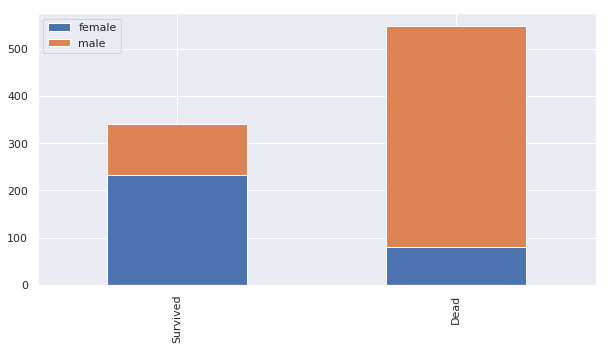

In [26]:
bar_chart('Sex')

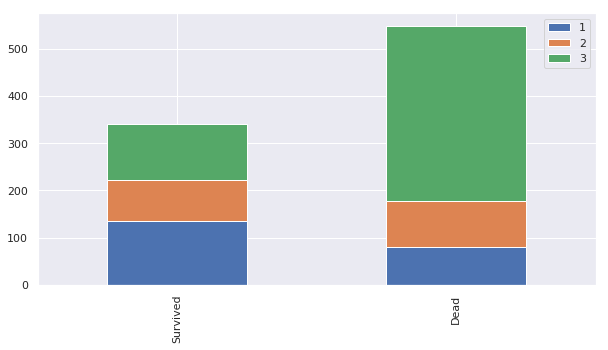

In [27]:
bar_chart('Pclass')

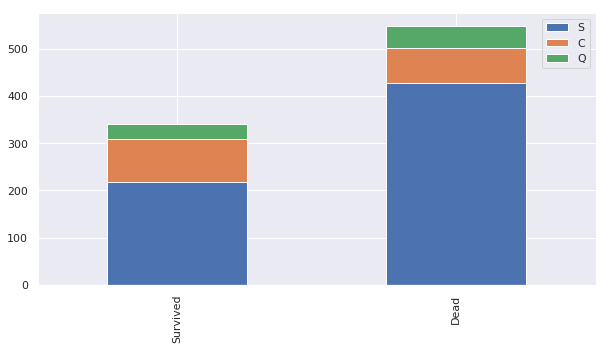

In [28]:
bar_chart('Embarked')

#### Some assumtions based on data analysis

* Sex is related with survivors, most of survivors are woman
* Class is related too, have more survivors from first class 

Its necessary fix database and change some categorical datas from number, like **Embarked** and **Sex**.

In [33]:
# Here we have significant correlation > .5, with class and survived

train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [35]:
# Here we have significant correlation > .5, with sex and survived

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [38]:
# Here we have significant correlation > .5 with sibling or spouse and survived

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [39]:
# Here we have significant correlation > .5 with parent or child and survived

train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [40]:
train_test_data = [train,test] # combine train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\.', expand=False)

In [43]:
# Print some treatments 

train['Title'].value_counts()
# print("-"*40)
# pd.crosstab(train['Title'], train['Sex'])

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Ms            1
Jonkheer      1
Don           1
Capt          1
Sir           1
Mme           1
Countess      1
Name: Title, dtype: int64

In [44]:
# Print some treatments and how many survived

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


## 4. Analyze by visualizing data

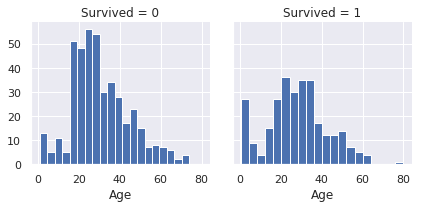

In [54]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(plt.hist, 'Age', bins=20)

**Observations**:

- Oldest passengers survived (Age = 80)
- Children > 4 y.o had high survival rate
- Most passengers are 17-32 not survived

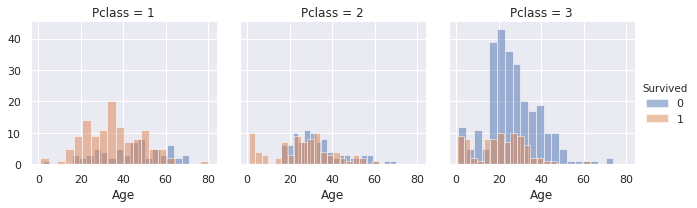

In [70]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations**:

- Most passengers from First class survived
- Most passengers from Third class did not survive
- Most children survived

/home/naiara/GIT/Titanic/myenv/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


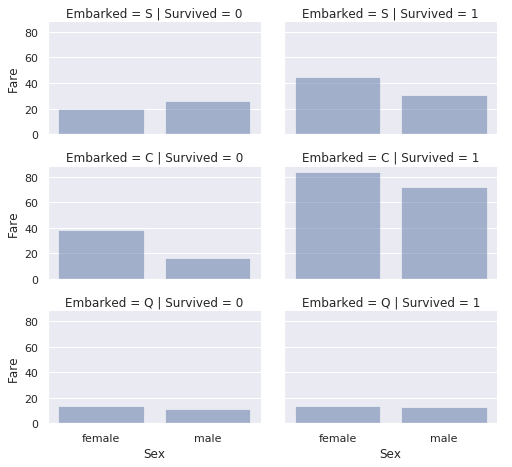

In [78]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations**:

- Most of passengers who embarked from C survived
- Woman who embarked from S had more chance to had survived